# Импортируем данные и сделаем обзорный анализ

---

Сразу отметим:
1. Пропущено около 20% данных о возрасте пассажиров.
2. Пропущено около 80% данных о каютах пассажиров.
3. У 15 пассажиров нулевая стоимость билетов.
4. У 2 пассажиров отсутствует порт отправления.
5. У 4 пассажиров нет номеров билетов.

In [1]:
import pandas as pd

# Считаем файл с данными
df = pd.read_csv('train.csv')
# Взглянем на данные!
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
#Пропущенные данные

from missingno import matrix

matrix(df, figsize=(10,5), color=(0.1, 0.25, 0.6), fontsize=8)

NameError: name 'df' is not defined

## Влияние пола и класса каюты на выживаемость

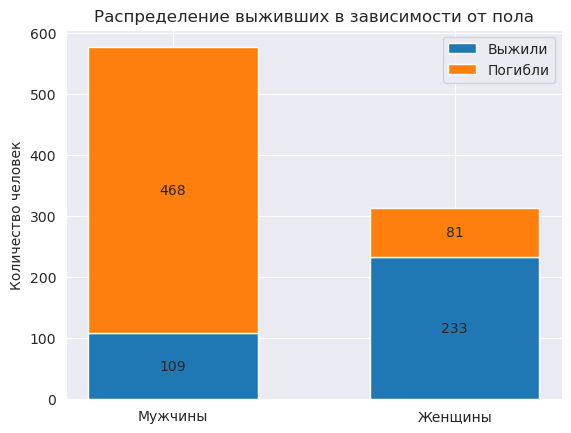

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Посчитаем общее количество мужчин и женщин, а также количество выживших
males_total = len(df.loc[(df['Sex'] == 'male')])
females_total = len(df.loc[(df['Sex'] == 'female')])
males_survived = len(df.loc[((df['Sex'] == 'male') & (df['Survived'] == 1))])
females_survived = len(df.loc[((df['Sex'] == 'female') & (df['Survived'] == 1))])

#Визуализируем
survivors_counts = {
    'Выжили': [males_survived, females_survived],
    'Погибли': [males_total-males_survived, females_total-females_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('Мужчины', 'Женщины'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от пола')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

In [4]:
#Посмотрим в процентном соотношении
print(f'''Выжило мужчин: {round(males_survived*100/males_total, 2)}%
Выжило женщин: {round(females_survived*100/females_total, 2)}%
''')

Выжило мужчин: 18.89%
Выжило женщин: 74.2%



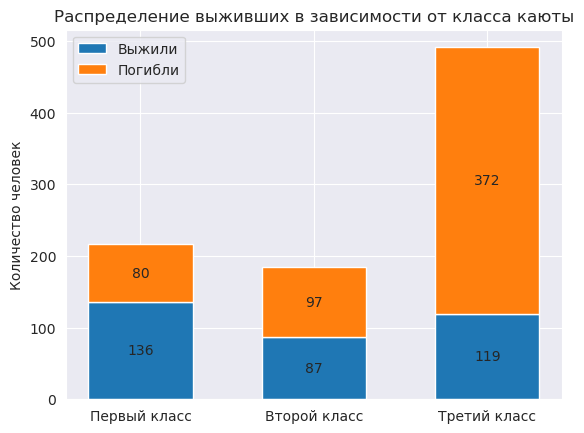

In [5]:
# Посчитаем общее количество для каждого из классов, количество выживших
first_total = len(df.loc[(df['Pclass'] == 1)])
second_total = len(df.loc[(df['Pclass'] == 2)])
third_total = len(df.loc[(df['Pclass'] == 3)])
first_survived = len(df.loc[((df['Pclass'] == 1) & (df['Survived'] == 1))])
second_survived = len(df.loc[((df['Pclass'] == 2) & (df['Survived'] == 1))])
third_survived = len(df.loc[((df['Pclass'] == 3) & (df['Survived'] == 1))])

#Визуализируем
survivors_counts = {
    'Выжили': [first_survived, second_survived, third_survived],
    'Погибли': [first_total-first_survived, second_total-second_survived, third_total-third_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(3)

for key, count in survivors_counts.items():
    p = ax.bar(('Первый класс', 'Второй класс', 'Третий класс'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от класса каюты')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

In [6]:
#Посмотрим в процентном соотношении
print(f'''Выжило из 1 класса: {round(first_survived*100/first_total, 2)}%
Выжило из 2 класса: {round(second_survived*100/second_total, 2)}%
Выжило из 3 класса: {round(third_survived*100/third_total, 2)}%
''')

Выжило из 1 класса: 62.96%
Выжило из 2 класса: 47.28%
Выжило из 3 класса: 24.24%



## Влияние возраста на выживаемость

---



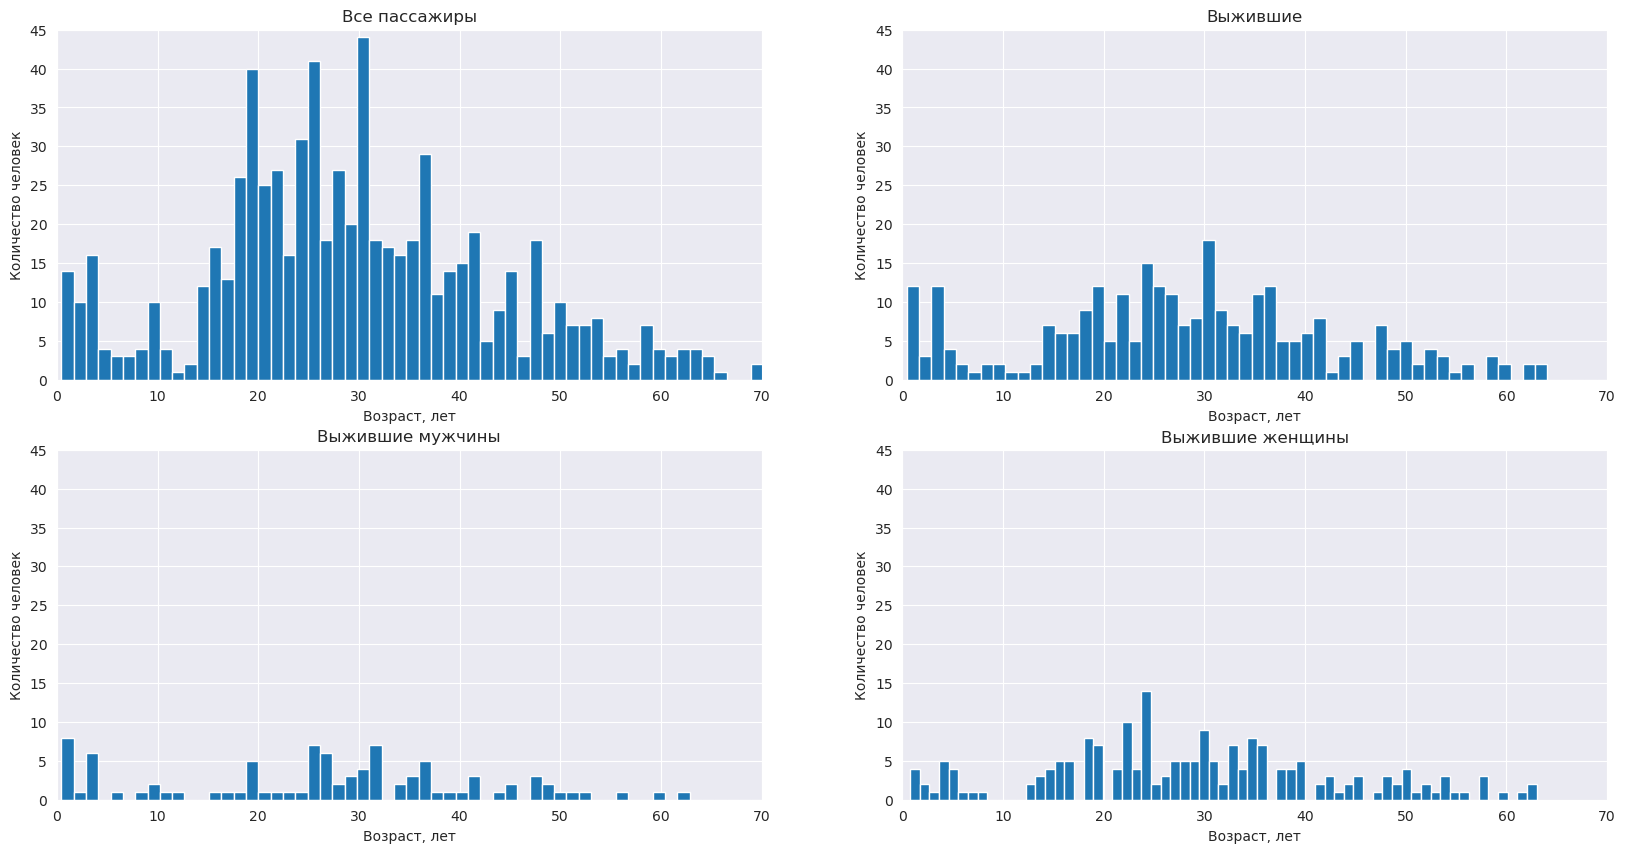

In [7]:
from collections import Counter

#Выберем списки пассжиров в отдельные группы, отфильтруем от nan значений
survivors = df.loc[((df['Survived'] == 1) & (df['Age'] > 0))]
male_survivors = df.loc[((df['Sex'] == 'male') & (df['Survived'] == 1) & (df['Age'] > 0))]
female_survivors = df.loc[((df['Sex'] == 'female') & (df['Survived'] == 1) & (df['Age'] > 0))]

#Число возрастов
num_of_ages = len(dict(Counter(survivors['Age'])).keys())

#Визуализируем
fig, axs = plt.subplots(2,2)
fig.set_figwidth(20)
fig.set_figheight(10)
names = [['Все пассажиры', 'Выжившие'], ['Выжившие мужчины', 'Выжившие женщины']]
for i, surv in enumerate([[df.loc[(df['Age'] > 0)], survivors], [male_survivors, female_survivors]]):
    for j, subsurv in enumerate(surv):
        axs[i][j].hist(subsurv['Age'], bins=num_of_ages)
        axs[i][j].set_title(names[i][j])
        axs[i][j].set_xlabel('Возраст, лет')
        axs[i][j].set_ylabel('Количество человек')
        axs[i][j].set_ylim(0,45)
        axs[i][j].set_xlim(0,70)
plt.show()

На каждой диаграмме можно заметить 2 характерные моды: одна соответствует детям, а другая людям с возрастом 20-30 лет. Причем на всех диаграммах распределение сохраняет свой характер, хоть при этом и смещается μ, падают амплитуды. Видно, что в зависимости от возраста количество выживших значительно разнится, поэтому возраст будет важным признаком при построении модели.\

In [8]:
import numpy as np

#Процент выживших детей
children = df.loc[((df['Age'] < np.float64(18.0)) & (df['Age'] > 0))]
survivors_children = df.loc[((df['Age'] < np.float64(18.0)) & (df['Survived'] == 1) & (df['Age'] > 0))]
print(f'Пасажиров до 18 лет спаслось {round(len(survivors_children)*100/len(children), 2)}%')

Пасажиров до 18 лет спаслось 53.98%


<AxesSubplot:>

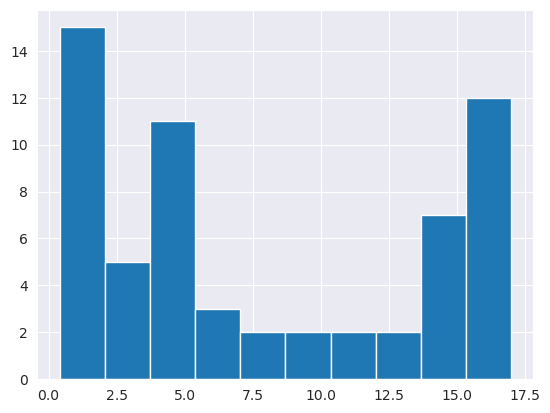

In [9]:
# Количество выживших среди детей
df.loc[((df['Survived'] == 1) & (df['Age'] > 0) & (df['Age'] < 18))].Age.hist()

## Корреляция титула и возраста

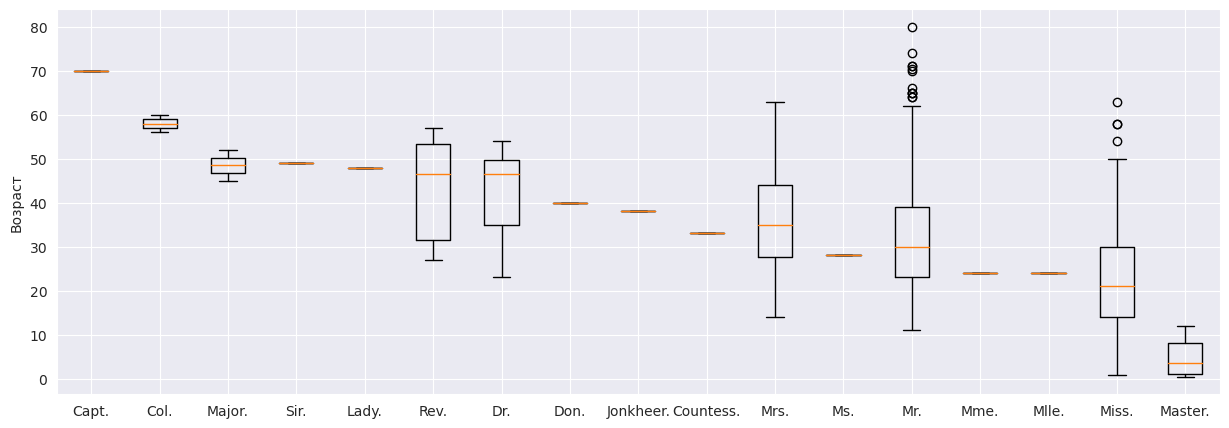

In [10]:
import matplotlib.pyplot as plt

#Перечень титулов
titles = ("Capt.","Col.","Major.","Sir.","Lady.","Rev.","Dr.","Don.","Jonkheer.","Countess.","Mrs.","Ms.","Mr.","Mme.","Mlle.","Miss.","Master.")

#Создадим список титулов для каждого пассажира
titled_names = []
for name in df.Name:
    for title in titles:
        if title in name.split(' '):
            titled_names.append(title)
            break


#Добавим в датафрейм новый столбец - Титул
df.insert(12, 'Title', titled_names)

#Создадим словарь с парами "титул: список возрастов"
ages = dict.fromkeys(titles, [])
for i, title in enumerate(df.Title):
    if not pd.isna(df.Age[i]):
        ages[title] = ages[title] + [df.Age[i]]

#Визуализируем
fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(ages.values(), labels=titles, vert=True)
ax.set_ylabel('Возраст')
plt.show()

## Пассажиры без указания возраста


Text(0, 0.5, 'Кол-вол выживших')

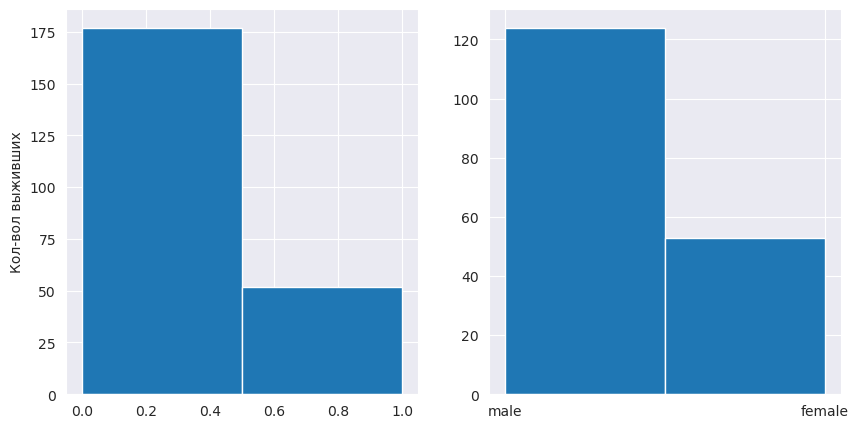

In [11]:
noage = df.loc[(pd.isna(df['Age']))]
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].hist(noage.Survived, bins=2, cumulative=-1)
ax[1].hist(noage.Sex, bins=2)
ax[0].set_ylabel('Кол-вол выживших')

### Восстановим возраста

In [12]:
for i, age in enumerate(df.Age):
    if pd.isna(age):
        df.Age[i] = np.median(ages[df.Title[i]])

df.loc[(pd.isna(df['Age']))]

/tmp/ipykernel_6503/1278440093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[i] = np.median(ages[df.Title[i]])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


### Выживаемость в зависимости от титула

/tmp/ipykernel_6503/1819210402.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Title[i] = 'Aristocratic.'
/tmp/ipykernel_6503/1819210402.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Title[i] = 'Miss.'
/tmp/ipykernel_6503/1819210402.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Title[i] = 'Mrs.'


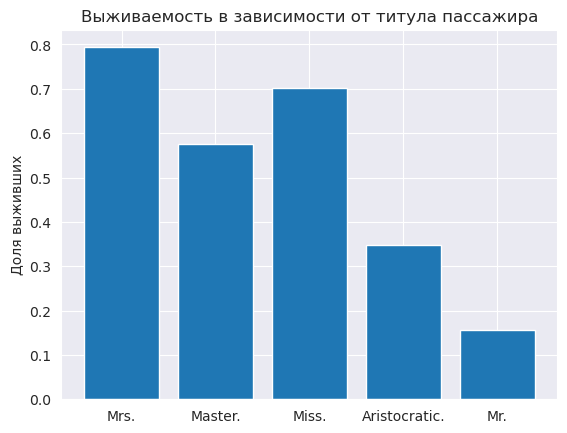

In [13]:
# Группы для объединения
aristocratic = ("Capt.", "Col.", "Don.", "Dr.",
                "Jonkheer.", "Lady.", "Major.",
                "Rev.", "Sir.", "Countess.")
mrs = ("Ms.")
miss = ("Mlle.", 'Mme.')

# Объединяем титулы
for i, title in enumerate(df.Title):
    if title in aristocratic:
        df.Title[i] = 'Aristocratic.'
    elif title in miss:
        df.Title[i] = 'Miss.'
    elif title in mrs:
        df.Title[i] = 'Mrs.'

# В данном случае будет удобно посмотреть на долю выживших, так как количество людей в каждом из титулов значительно разнится
title_survive_percent = dict.fromkeys(set(df.Title), None)
for title in title_survive_percent.keys():
    title_survive_percent[title] = len(df.loc[((df['Title'] == title) & (df['Survived'] == 1))]) / len(df.loc[(df['Title'] == title)])

#Визуализируем
fig, ax = plt.subplots()
ax.bar(title_survive_percent.keys(), title_survive_percent.values())
ax.set_ylabel('Доля выживших')
ax.set_title('Выживаемость в зависимости от титула пассажира')
plt.show()

### Номер каюты

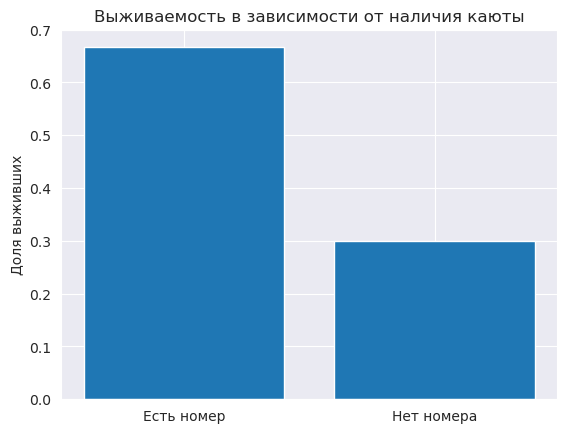

In [14]:
have_cabin = df.loc[(pd.notna(df['Cabin']))]
have_cabin_survived = df.loc[((pd.notna(df['Cabin'])) & (df['Survived'] == 1))]
no_cabin = df.loc[(pd.isna(df['Cabin']))]
no_cabin_survived = df.loc[((pd.isna(df['Cabin'])) & (df['Survived'] == 1))]

fig, ax = plt.subplots()
ax.bar(('Есть номер', 'Нет номера'), (len(have_cabin_survived)/len(have_cabin), len(no_cabin_survived)/len(no_cabin)))
ax.set_ylabel('Доля выживших')
ax.set_title('Выживаемость в зависимости от наличия каюты')
plt.show()

### Родственники на борту

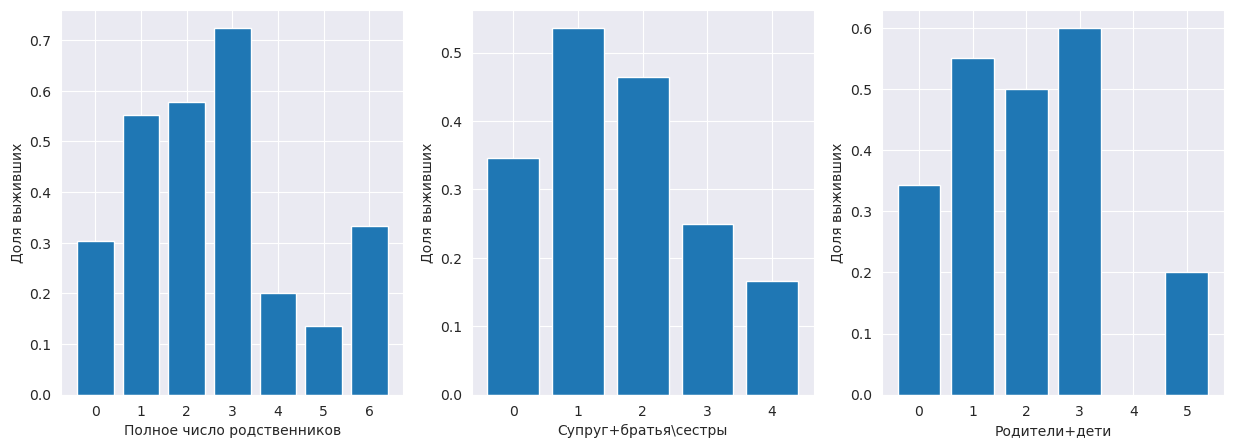

In [15]:
# Добавим признак family
df.insert(13, 'Family', np.array(df.SibSp, int) + np.array(df.Parch, int))


sibsp_total = dict(Counter(df.SibSp))
parch_total = dict(Counter(df.Parch))
family_total = dict(Counter(df.Family))
sibsp_survived = dict(Counter(df.loc[(df['Survived'] == 1)].SibSp))
parch_survived = dict(Counter(df.loc[(df['Survived'] == 1)].Parch))
family_survived = dict(Counter(df.loc[(df['Survived'] == 1)].Family))
relatives = (family_total, sibsp_total, parch_total)
relatives_survived = (family_survived, sibsp_survived, parch_survived)

fig, axs = plt.subplots(1, 3, figsize=(15,5))
xlabs = ('Полное число родственников', 'Супруг+братья\сестры', 'Родители+дети')

for i in range(3):
    probs = []
    for rel, amount in relatives_survived[i].items():
        probs.append(amount / relatives[i][rel])
    axs[i].bar(relatives_survived[i].keys(), probs)
    axs[i].set_ylabel('Доля выживших')
    axs[i].set_xlabel(xlabs[i])

<AxesSubplot:>

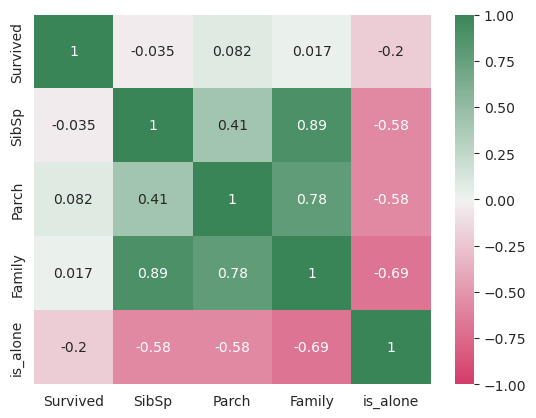

In [16]:
import seaborn as sns

# Добавим признак is_alone
is_alone = []
for fam in df.Family:
    if fam == 0:
        is_alone.append(1)
    else:
        is_alone.append(0)
df.insert(14, 'is_alone', is_alone)

# Correlation heatmap
sns.heatmap(df[['Survived', 'SibSp', 'Parch', 'Family', 'is_alone']].corr(), annot=True, vmin=-1, vmax=1, cmap=sns.diverging_palette(0, 500, as_cmap=True))

### Стоимость билетов - корреляция и замена нулей

<AxesSubplot:>

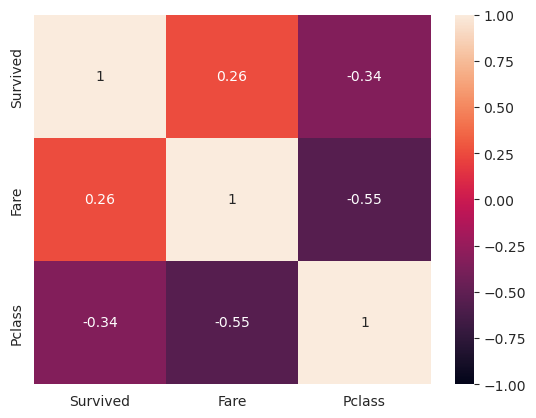

In [20]:
sns.heatmap(df[['Survived', 'Fare', 'Pclass']].corr(), annot=True, vmin=-1, vmax=1)

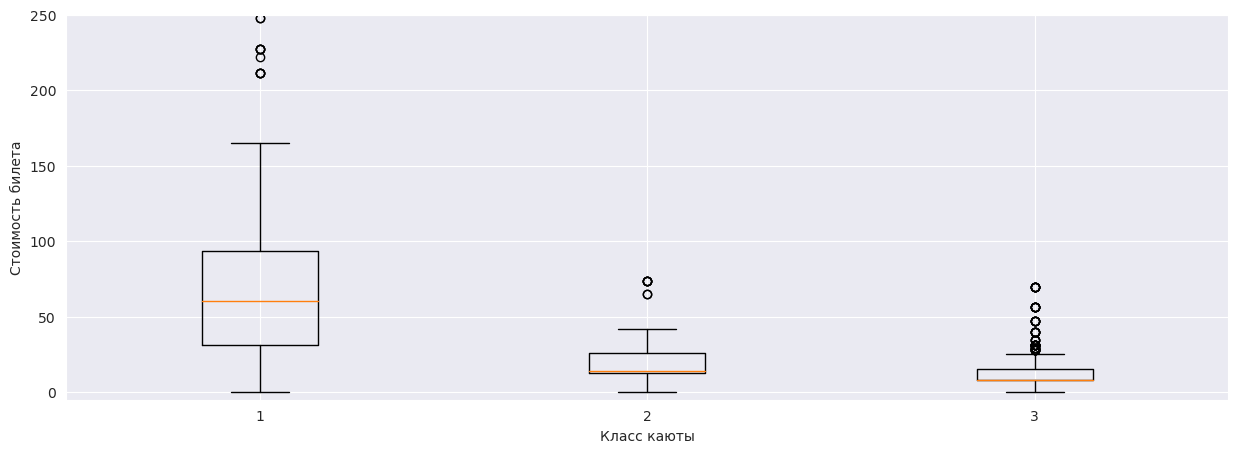

In [27]:
fares = dict.fromkeys((1,2,3), [])
for i, price in enumerate(df.Fare):
    fares[df.Pclass[i]] = fares[df.Pclass[i]] + [price]


fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(fares.values(), labels=(1,2,3), vert=True)
ax.set_ylabel('Стоимость билета')
ax.set_xlabel('Класс каюты')
ax.set_ylim(-5, 250)
plt.show()

In [28]:
for i, fare in enumerate(df.Fare):
    if np.isclose(fare, .0):
        df.Fare[i] = np.median(fares[df.Pclass[i]])

df

/tmp/ipykernel_6503/2323771121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Fare[i] = np.median(fares[df.Pclass[i]])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Aristocratic.,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss.,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,0,1


/tmp/ipykernel_6503/1060580478.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if pd.isna(emb): df.Embarked[i] = 'S'


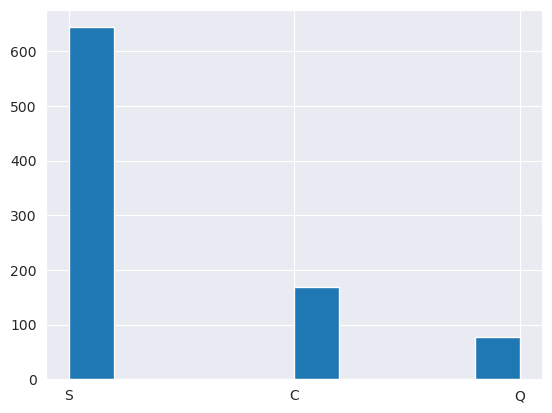

In [35]:
# Порт отправления
df.Embarked.hist()

for i, emb in enumerate(df.Embarked):
    if pd.isna(emb): df.Embarked[i] = 'S'

# Формирование признаков!

Напишем функцию, которая будет первращать исходный датасет в датасет признаков, причем чтобы она работала как с тренировочными, так и с тестовыми данными. Для удобства воспользуемся SQL базой данных.



In [16]:
import pandas as pd
import numpy as np

TITLES = ("Capt.","Col.","Major.","Sir.","Lady.","Rev.","Dr.","Don.","Jonkheer.","Countess.","Mrs.","Ms.","Mr.","Mme.","Mlle.","Miss.","Master.", "Dona.")
ARISTOCRATIC = ("Capt.", "Col.", "Don.", "Dr.",
                "Jonkheer.", "Lady.", "Major.",
                "Rev.", "Sir.", "Countess.", 'Dona.')
MRS = ("Ms.")
MISS = ("Mlle.", 'Mme.')

for file in ('train', 'test'):

    # Считываем файл
    dataset = pd.read_csv(f'data/{file}.csv')

    # Кодируем пол
    dataset = dataset.replace({'female' : 1, 'male': 0})

    # Восстанавливаем стоимость билетов
    dataset.Fare.fillna(0, inplace = True)
    fares = dict.fromkeys((1,2,3), [])
    for i, price in enumerate(dataset.Fare):
        fares[dataset.Pclass[i]] = fares[dataset.Pclass[i]] + [price]
    for i, fare in enumerate(dataset.Fare):
        if np.isclose(fare, .0):
            dataset.loc[i, 'Fare'] = np.median(fares[dataset.Pclass[i]])

    #Создадим список титулов для каждого пассажира
    titled_names = []
    for name in dataset.loc[:, 'Name']:
        for title in TITLES:
            if title in name.split(' '):
                titled_names.append(title)
                break

    # Вставляем в датасет столбец Title
    dataset.insert(1, 'Title', titled_names)

    #Создадим словарь с парами "титул: список возрастов"
    ages = dict.fromkeys(TITLES, [])
    for i, title in enumerate(dataset.Title):
        if not pd.isna(dataset.Age[i]):
            ages[title] = ages[title] + [dataset.Age[i]]

    # Создаем признак Семья
    dataset['Family'] = dataset.Parch + dataset.SibSp

    # Кодируем бинарные признаки
    dataset['Is_Alone'] = dataset.Family == 0
    dataset['Have_Age'] = pd.notna(dataset.Age)
    dataset['Have_Cabin'] = pd.notna(dataset.Cabin)
    dataset = dataset.replace({True: 1, False: 0})

    # Восстанавливаем пропущенные возраста
    for i, age in enumerate(dataset.loc[:, 'Age']):
        if pd.isna(age):
            dataset.loc[i, 'Age'] = np.median(ages[dataset.Title[i]])

    # Объединяем титулы
    for i, title in enumerate(dataset.Title):
        if title in ARISTOCRATIC:
            dataset.loc[i, 'Title'] = 'Aristocratic.'
        elif title in MISS:
            dataset.loc[i, 'Title'] = 'Miss.'
        elif title in MRS:
            dataset.loc[i, 'Title'] = 'Mrs.'

    # Восстанавливаем порт отправления
    dataset.Embarked.fillna(dataset.Embarked.mode()[0], inplace = True)

    # Кодируем порт и титулы
    dataset = dataset.join(pd.get_dummies(dataset.Embarked, prefix='Emb'))
    dataset = dataset.join(pd.get_dummies(dataset.Title, prefix='Title'))

    # Чистим от лишних столбцов
    dataset = dataset.drop(columns=['Ticket', 'Name', 'SibSp', 'Parch', 'Cabin', 'Title', 'Embarked'])

    # Перемещаем столбец Survived в конец
    try:
        dataset.insert(dataset.shape[1] - 1, 'Survived', dataset.pop('Survived'))
    except KeyError:
        ...

    dataset.to_csv(f'data/clear_{file}.csv', index=False)

/home/pavel/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pavel/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: >

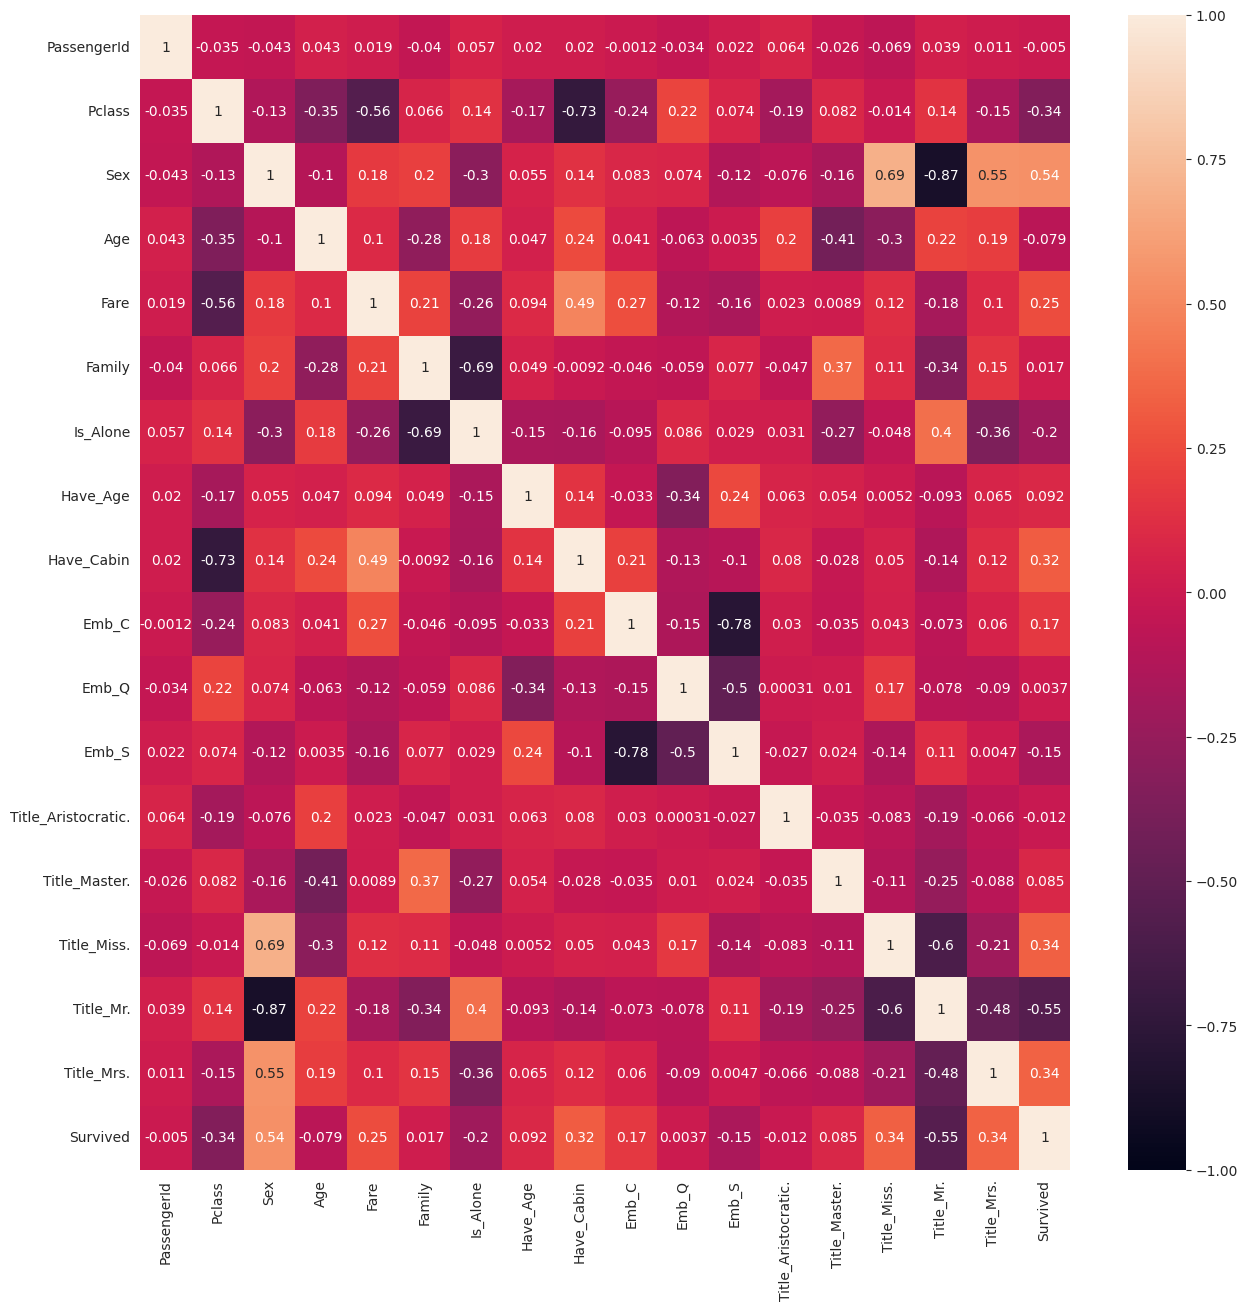

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Таблица корреляции признаков
train_set = pd.read_csv('data/clear_train.csv')

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(train_set.corr(), annot=True, vmin=-1, vmax=1, ax=ax)

In [14]:
train_set.plot.scatter()

TypeError: PlotAccessor.scatter() missing 2 required positional arguments: 'x' and 'y'